```{include} ../math-definitions.md
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.gmm import IV2SLS
from scipy.stats import zscore

# Estimación

##   Métodos de estimación

Se clasifican en métodos indirectos y métodos directos.

Los directos se clasifican en dos grupos:

```{panels}
Métodos de información limitada
^^^
- OLS
- IV
- 2SLS
- GMM
- LIML

---
Métodos de información completa
^^^
- 3SLS
- FIML
- GMM
```

##   Consistencia de OLS de la forma reducida
El estimador OLS de las pendientes $\Pi$ es **consistente**
\begin{align*}
\plim\hat{\Pi} &= \plim\left[\left(X'X\right)^{-1}X'Y\right]\\
&= \plim\left[\left(\tfrac{1}{T}X'X\right)^{-1}\tfrac{1}{T}X'Y\right]\\
&= \left(\plim\tfrac{1}{T}X'X\right)^{-1} \plim\left(\tfrac{1}{T}X'Y\right)\\
&= Q^{-1} \left(Q\Pi\right) \\
&= \Pi
\end{align*}


El estimador MCO de la varianza $\Omega$ también es **consistente**
\begin{align*}
\plim\hat{\Omega} &= \plim\left[\tfrac{1}{T}\hat{V}'\hat{V}\right] \\
&= \plim\left[\tfrac{1}{T}\left(Y-X\hat{\Pi}\right)'\left(Y-X\hat{\Pi}\right)\right] \\
&= \plim\left(\tfrac{1}{T}Y'Y\right) - \plim\left(\tfrac{1}{T}Y'X\hat{\Pi}\right) - \plim\left(\hat{\Pi}'\tfrac{1}{T}X'Y\right) +  \plim\left(\hat{\Pi}'\tfrac{1}{T}X'X\hat{\Pi}\right) \\
&= \Pi'Q\Pi + \Omega - \left(\Pi'Q\right)\Pi - \Pi'\left(Q\Pi\right) + \Pi'\left(Q\right)\Pi \\
&= \Omega
\end{align*}



##   Mínimos cuadrados indirectos (ILS)

Es posible estimar $\Pi$ y $\Omega$ consistentemente con OLS, pero estos parámetros no son de interés (excepto para proyectar $Y|X$).

No obstante, si el sistema está identificado, se puede usar Mínimos Cuadrados Indirectos (ILS), que consiste en estimar $\estimator{\Gamma}{ILS}$, $\estimator{B}{ILS}$ y $\estimator{\Sigma}{ILS}$ en función de $\estimator{\Pi}{OLS}$ y $\estimator{\Omega}{OLS}$.

Propiedades:

- factible pero ineficiente
- puede haber más de una solución (si está sobre- identificado).

##   Mínimos cuadrados ordinarios (OLS)
Escribimos la ecuación $j$ como
\begin{equation*}
y_j = Y_j\gamma_j + X_j\beta_j + \epsilon_j
= \notation{\MAT{Y_j & X_j}}{$Z_j$}\notation{\MAT{\gamma_j\\ \beta_j}}{$\delta_j$} + \epsilon_j =Z_j\delta_j + \epsilon_j
\end{equation*}


### Estimador OLS

\begin{align*}
\estimator{\delta_j}{OLS} &= \left(Z'_jZ_j\right)^{-1} Z'_jy_j \\
&= \left(Z'_jZ_j\right)^{-1} Z'_j(Z_j\delta_j + \epsilon_j)\\
&= \delta_j + \left(Z'_jZ_j\right)^{-1} Z'_j\epsilon_j\\
&= \delta_j + \MAT{Y'_jY_j & Y'_jX_j \\ X'_jY_j & X'_jX_j}^{-1}\MAT{Y'_j\epsilon_j\\ X'_j\epsilon_j}
\end{align*}

```{warning}
**OLS es inconsistente** porque $ \plim\left[\tfrac{1}{T}Y'_j\epsilon_j\right] \neq 0 $ (sesgo de simultaneidad)
```

##   Caso particular: Modelo recursivo
En el modelo recursivo donde $\Gamma$ es triangular y $\Sigma$ es diagonal,

\begin{align*}
y_1 &=x'\beta_1 + \epsilon_1\\
y_2 &=x'\beta_2 + \gamma_{12}y_1  + \epsilon_2\\
&\vdots \\
y_M &=x'\beta_M + \gamma_{1M}y_1+\dots+\gamma_{M-1,M}y_{M-1}+ \epsilon_M
\end{align*}

OLS es consistente y eficiente, porque no hay sesgo de simultaneidad:

\begin{align*}
\Cov\left[y_1,\epsilon_2\right] &= \Cov\left[x'\beta_1+\epsilon_1,\epsilon_2\right] = 0 \\
\Cov\left[y_1,\epsilon_3\right] &= \Cov\left[x'\beta_1+\epsilon_1,\epsilon_3\right] = 0 \\
\Cov\left[y_2,\epsilon_3\right] &= \Cov\left[x'\beta_2 + \gamma_{12}y_1  + \epsilon_2,\epsilon_3\right] = 0
\end{align*}

y así sucesivamente.


##   Variables instrumentales (IV)

Muchos estimadores son casos particulares de IV

Para la ecuación $ y_j = Y_j\gamma_j + X_j\beta_j + \epsilon_j = Z_j\delta_j + \epsilon_j$ suponemos que existe matriz $\simbolo{W_j}{T\times(M_j+K_j)}$  tal que:

instrumento correlacionado con regresores
: $\plim\left(\tfrac{1}{T}W'_jZ_j\right) = \Sigma_{WZ}$

instrumento tiene varianza finita
: $\plim\left(\tfrac{1}{T}W'_jW_j\right) = \Sigma_{WW}$

instrumento NO correlacionado con errores
: $\plim\left(\tfrac{1}{T}W'_j\epsilon_j\right) = 0$




### Estimador IV
\begin{align*}
\estimator{\delta_j}{IV} &= \left(W'_jZ_j\right)^{-1} W'_jy_j \\
&= \delta_j + \left(\tfrac{1}{T}W'_jZ_j\right)^{-1} \left(\tfrac{1}{T}W'_j\epsilon_j\right)
\end{align*}

```{important}
**IV es consistente** porque $ \plim\left[\tfrac{1}{T}W'_j\epsilon_j\right] = 0 $.
```


##   Mínimos cuadrados en dos etapas (2SLS)
Consiste en usar como intrumentos para $Y_j$ los valores ajustados por la regresión de $Y_j$ en \alert{todas} las $X$’s del sistema.

Etapa 1
: Ajustar $Y_j$ por OLS usando todas las $X$
\begin{equation*}
\estimator{Y_j}{OLS} = X\estimator{\Pi_j}{OLS} = X\left(X'X\right)^{-1} X'Y_j
\end{equation*}

Etapa 2
: Usar IV con $W = \MAT{\estimator{Y_j}{OLS} & X}$.

### Estimador 2SLS
\begin{equation*}
	\estimator{\delta_j}{2SLS} = \MAT{\estimator{Y'_j}{OLS}Y_j & \estimator{Y'_j}{OLS}X_j \\ X'_jY_j & X'_jX_j}^{-1}\MAT{\estimator{Y'_j}{OLS}y_j\\ X'_jy_j}
\end{equation*}


Si no hay autocorrelación ni heteroscedasticidad entonces 2SLS es el estimador IV más eficiente usando sólo la información de $X$.




{{ empieza_ejemplo }} El Modelo Klein I {{ fin_titulo_ejemplo }}

En 1950 Klein estimó este modelo (conocido ahora como el modelo I de Klein) con datos anuales de 1921 a 1941\footnote{\scriptsize Basado en \textcite[pp332-333]{Greene:2012}}:
\begin{align*}
\notation{C_t}{consumo}	&= \alpha_0 + \alpha_1 P_t + \alpha_2 P_{t-1} + \alpha_3(Wp_t + Wg_t) + \epsilon_{1t}  \\
\notation{I_t}{inversión} &= \beta_0 + \beta_1 P_t + \beta_2 P_{t-1} + \beta_3 K_{t-1} + \epsilon_{2t}  \\
\notation{Wp_t}{$\substack{\text{salarios}\\\text{privados}}$} &= \gamma_0  + \gamma_1 X_t + \gamma_2 X_{t-1} + \gamma_3 A_t + \epsilon_{3t} \\
\notation{X_t}{producto} &= C_t + I_t + G_t \\
\notation{P_t}{utilidades} &= X_t -  T_t - Wp_t \\
\notation{K_t}{capital} &= K_{t-1} + I_{t-1}
\end{align*}


Las variables exógenas son:
- $G_t  =$ gasto (no salarial) del gobierno
- $T_t  =$ impuestos indirectos a las empresas + exportaciones netas
- $Wg_t =$ gastos salarial del gobierno
- $A_t  =$ tendecia, años desde 1931

Hay tres variables predeterminadas: los rezagos del stock de capital, utilidades privadas, y demanda total.

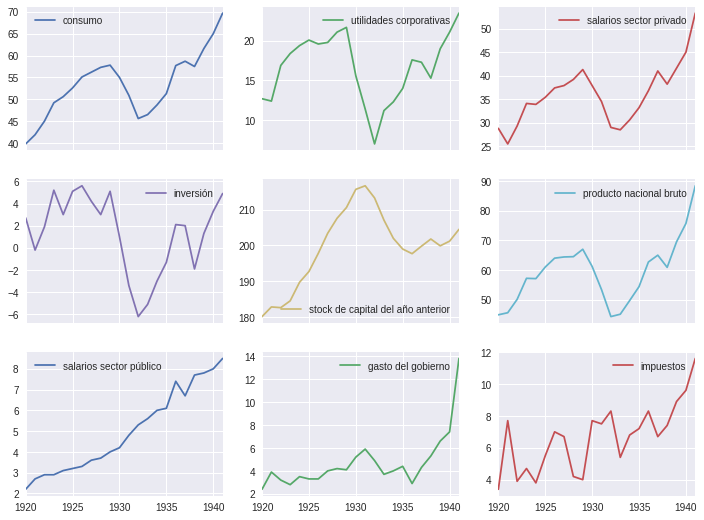

In [2]:
klein = pd.read_fwf("http://people.stern.nyu.edu/wgreene/Text/Edition7/TableF10-3.txt")
klein.dropna(inplace=True)
klein['Year'] = klein['Year'].astype(int)
klein.index = pd.period_range(start=klein['Year'].iloc[0], periods=klein.shape[0], freq="A")
del klein['Year']

datanames = dict(
  C="consumo",
  P="utilidades corporativas",
  Wp="salarios sector privado",
  I="inversión",
  K1="stock de capital del año anterior",
  X="producto nacional bruto",
  Wg="salarios sector público",
  G="gasto del gobierno",
  T="impuestos")

klein.rename(columns=datanames).plot(
  subplots=True, figsize=[12,9], layout=[-1,3]);

El modelo contiene 3 ecuaciones de comportamiento, una condición de equilibrio, y dos identidades contables.

In [3]:
# La variable `K1` en la base de datos corresponde al *rezago* del capital, por lo que generamos `K`. Además, generamos la tendencia y el intercepto.

klein['A'] = np.arange(klein.shape[0]) - 11
klein['interc'] = 1

# Generamos las variables predeterminadas y la suma de salarios
klein['P1'] = klein['P'].shift(1)
klein['X1'] = klein['X'].shift(1)
klein['W'] = klein['Wp'] + klein['Wg']

klein.dropna(inplace=True);

{badge}`Etapa 1, badge-success` regresión de las endógenas contra todas las exógenas del sistema

In [4]:
# Clasificamos las variables en tres grupos: endógenas, exogenas, y predeterminadas

endogenas = ['C', 'I', 'Wp', 'X', 'P']
exogenas = ['interc', 'G', 'T', 'Wg', 'A']
predeterminadas = ['K1', 'P1', 'X1']

regresores_eqs = [
  ['interc', 'P', 'P1', 'W'],
  ['interc', 'P', 'P1', 'K1'],
  ['interc', 'X', 'X1', 'A']]

Y = klein[endogenas]
X = klein[exogenas+predeterminadas]

beta = np.linalg.solve(X.T@X, X.T@Y)
beta = pd.DataFrame(beta, columns=endogenas, index=exogenas+predeterminadas)

yhat = X@beta
beta.style.format("{:.2f}", na_rep=" ")

,C,I,Wp,X,P
interc,58.30,35.52,43.44,93.82,50.38
G,0.21,0.10,0.87,1.31,0.44
T,-0.37,-0.16,-0.60,-0.53,-0.92
Wg,0.19,-0.72,-0.44,-0.52,-0.08
A,0.70,0.33,0.71,1.03,0.32
K1,-0.15,-0.19,-0.12,-0.34,-0.22
P1,0.75,0.93,0.87,1.67,0.80
X1,0.23,-0.11,0.10,0.12,0.02


{badge}`Etapa 2, badge-success` se sustituyen endógenas por su valor ajustado de la etapa 1

In [5]:
# Preparar datos para la segunda etapa

# Definir lista de instrumentos para cada ecuación: esta lista es igual a la lista de regresores original, pero sustituyendo las endógenas por su valor ajustado de la etapa 1

klein_ols = pd.concat([yhat, klein[exogenas+predeterminadas]], axis=1)
klein_ols['W'] = klein_ols['Wp'] + klein_ols['Wg']

# Etapa 2
coef2sls = []
for xx, yy in zip(regresores_eqs, endogenas[:3]):
    X1, y1 = klein_ols[xx], klein_ols[yy]
    beta1 = np.linalg.solve(X1.T@X1, X1.T@y1)
    coef2sls.append(pd.Series(beta1.ravel(), index=xx, name=yy))
pd.concat(coef2sls, axis=1, sort=False).style.format("{:.2f}", na_rep=" ")

,C,I,Wp
interc,16.55,20.28,1.50
P,0.02,0.15,
P1,0.22,0.62,
W,0.81,,
K1,,-0.16,
X,,,0.44
X1,,,0.15
A,,,0.13


El estimador 2SLS del sistema es (estadístico $p$ en paréntesis):
\begin{align*}
C_t	 &= \estimate{16.55}{0.00} + \estimate{0.02}{0.88} P_t + \estimate{0.22}{0.04} P_{t-1} + \estimate{0.81}{0.00}(Wp_t + Wg_t) + \epsilon_{1t}  \\
I_t  &= \estimate{20.28}{0.01} + \estimate{0.15}{0.39} P_t + \estimate{0.62}{0.00} P_{t-1} - \estimate{0.16}{0.00} K_{t-1} + \epsilon_{2t}  \\
Wp_t &= \estimate{1.50}{0.19}  + \estimate{0.44}{0.00} X_t + \estimate{0.15}{0.00} X_{t-1} + \estimate{0.13}{0.00} A_t + \epsilon_{3t}
\end{align*}


Este modelo también lo podemos estimar directamente con `statsmodels`:

In [6]:
for xx, yy in zip(regresores_eqs, endogenas[:3]):
    fit = IV2SLS(klein[yy], klein[xx], instrument=X).fit()
    print(f'Estimación de la ecuación de {datanames[yy]}')
    print(fit.summary())

Estimación de la ecuación de consumo
                          IV2SLS Regression Results                           
Dep. Variable:                      C   R-squared:                       0.977
Model:                         IV2SLS   Adj. R-squared:                  0.973
Method:                     Two Stage   F-statistic:                     225.9
                        Least Squares   Prob (F-statistic):           6.82e-14
Date:                Wed, 24 Mar 2021                                         
Time:                        22:08:04                                         
No. Observations:                  21                                         
Df Residuals:                      17                                         
Df Model:                           3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
interc        1

{{ termina_ejemplo }}


{{ empieza_ejemplo }} El modelo de la telaraña {{ fin_titulo_ejemplo }}

En el modelo de la telaraña para los mercados de maíz y de trigo

\begin{align*}
	q^s_{mt} & = 200 &+& 0.5p_{m,t-1} &-& 0.2p_{w,t-1} &+& \epsilon^s_{mt}  \tag{oferta de maíz}  \\
	q^s_{wt} & = 80  &-& 0.2p_{m,t-1} &+& 0.4p_{w,t-1} &+& \epsilon^s_{wt}  \tag{oferta de trigo} \\
	q^d_{mt} & = 100 &-& 0.2p_{mt}    &+& 1.2p_{wt}    &+& \epsilon^d_{mt} \tag{demanda de maíz}       \\
	q^d_{wt} & = 50  &+& 1.1p_{mt}    &-& 0.4p_{wt}    &+& \epsilon^d_{wt} \tag{demanda de trigo}
\end{align*}


Los agricultores pueden sembrar maíz o trigo, pero tardan un período en producirlo.

Los consumidores están dispuestos a sustituir el consumo de maíz y trigo en respuesta a los precios que encuentran.

Este modelo puede escribirse

\begin{equation*}
\notation{\MAT{1 & 0  & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0.2 & -1.2 \\ 0 & 1 & -1.1 & 0.4}}{$\Gamma$}
\notation{\MAT{q_{mt} \\ q_{wt} \\ p_{mt} \\ p_{wt}}}{$Y_t$} =
\notation{\MAT{200 & 0.5 & -0.2 \\ 80 & -0.2 & 0.4 \\  100 & 0 & 0 \\ 50 & 0 & 0}}{$B$}
\notation{\MAT{1 \\ p_{m,t-1} \\ p_{w,t-1}}}{$Y_{t-1}$}  +
\notation{\MAT{\epsilon^s_{mt} \\ \epsilon^s_{wt} \\ \epsilon^d_{mt} \\ \epsilon^d_{wt}}}{$\epsilon_t$}
\end{equation*}


Vemos que las ecuaciones de oferta no son simultáneas, pero las de demanda sí lo son.

Para ilustrar el sesgo de simultaneidad del estimador OLS, y que el estimador 2SLS sí es insesgado, realizamos experimentos de Monte Carlo.


Para ilustrar el procedimiento, simulamos una muestra de 100 observaciones:

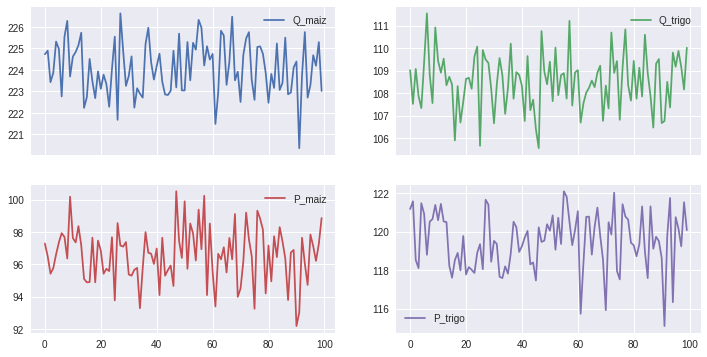

In [7]:
# Definimos los parámetros del modelo
endogenas = ['Q_maiz','Q_trigo','P_maiz','P_trigo']

Gamma = np.array([      # RELACIÓN SIMULTANEA
    [1, 0,   0,    0],  # oferta maiz
    [0, 1,   0,    0],  # oferta trigo
    [1, 0, 0.2, -1.2],  # demanda maiz
    [0, 1,-1.1, 0.4]])  # demanda trigo

cstr = np.array([200,80,100,50])  # interceptos forma estructural

Beta = np.array([  # PENDIENTES ESTRUCTURALES
    [ 0.5, -0.2],  # oferta maiz
    [-0.2,  0.4],  # oferta trigo
    [   0,    0],  # demanda maiz
    [   0,    0]]) # demanda trigo


# A partir de la inversa de Γ, obtenemos los parámetros de la forma reducida
Gammainv = np.linalg.inv(Gamma)

cred = Gammainv @ cstr # interceptos forma reducida
Pi = Gammainv @ Beta   # pendientes forma reducida

# Definimos la función *telaraña*, la cual simula $T$ observaciones de los precios y cantidades de trigo, luego de desechar las primeras *drop* observaciones. El resultado se retorna como una tabla de *Pandas*, la cual facilita la creación de gráficos y la estimación econométrica posterior.

def telaraña(T, drop=10, estocastico=True):
    if estocastico:
        e_struc = np.random.randn(T+drop,4)
        e_reduc = e_struc @ Gammainv.T
    else:
        e_reduc = np.zeros((T+drop,4))

    y = np.zeros((T+drop,4))
    y[0,-2:] = [120, 70]
    for t in range(T+drop-1):
        y[t+1] = cred + Pi @ y[t,-2:] + e_reduc[t+1]
    return pd.DataFrame(y[drop:], columns=endogenas)


telaraña(100).plot(subplots=True, layout=[2,2], figsize=[12,6], sharex=True);

En particular estimamos 1000 veces este modelo a partir de series simuladas de 24 observaciones.

In [8]:
NSIMUL = 1000

def telaraña_con_precios_rezagos(T=24):
    datos = telaraña(T)
    datos['LP_maiz'] = datos['P_maiz'].shift()   # precio maiz rezagado
    datos['LP_trigo'] = datos['P_trigo'].shift() # precio trigo rezagado
    return datos

np.random.seed(123)
DATOS_SIMULADOS = pd.concat(
  [telaraña_con_precios_rezagos() for n in range(NSIMUL)],
  keys = range(NSIMUL)
  )

def ols_params(modelo):
    return pd.DataFrame(
      [ols(modelo, df.loc[_]).fit().params
         for _, df in DATOS_SIMULADOS.groupby(level=0)]
       )

PARAMETROS_SIMULADOS = {
 'ms_ols': ols_params('Q_maiz ~ 1 + LP_maiz + LP_trigo'),
 'ws_ols': ols_params('Q_trigo ~ 1 + LP_maiz + LP_trigo'),
 'md_ols': ols_params('Q_maiz ~ 1 + P_maiz + P_trigo'),
 'wd_ols': ols_params('Q_trigo ~ 1 + P_maiz + P_trigo')
}

exogenas = ['1', 'P_maiz', 'P_trigo']
instrum = ['1', 'LP_maiz', 'LP_trigo']

def tsls_params(modelo):
    return pd.DataFrame(
        [IV2SLS(df.loc[i,modelo], df.loc[i,exogenas], df.loc[i,instrum]).fit().params
         for i, df in DATOS_SIMULADOS.groupby(level=0)])

DATOS_SIMULADOS.dropna(inplace=True)
DATOS_SIMULADOS['1'] = 1.0

PARAMETROS_SIMULADOS['md_2sls'] = tsls_params('Q_maiz')
PARAMETROS_SIMULADOS['wd_2sls'] = tsls_params('Q_trigo')



true_params = {
    'ms': np.r_[cstr[0],Beta[0]],
    'ws': np.r_[cstr[1],Beta[1]],
    'md': np.r_[cstr[2], -Gamma[2,-2:]],
    'wd': np.r_[cstr[3], -Gamma[3,-2:]]}

description = {
    'ms': 'Oferta de maíz',
    'ws': 'Oferta de trigo',
    'md': 'Demanda de maíz',
    'wd': 'Demanda de trigo'}

def plot_result(caso, remove_outlier=False):
    simul = PARAMETROS_SIMULADOS[caso]

    # remove outliers
    if remove_outlier:
        not_outlier = (np.abs(zscore(simul)) < 3).all(axis=1)
        print(f'Se detectaron {(~not_outlier).sum()} outliers')
        simul = simul[not_outlier]

    fig, axs = plt.subplots(1,3,figsize=[12,3])
    true_values = true_params[caso[:2]]
    for ax, serie, xv in zip(axs, simul, true_values):
        simul[serie].hist(bins=20,ax=ax, alpha=0.75)
        ax.axvline(x=xv,linewidth=4, color='r')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set(yticks=[], xlabel=serie)
        ax.grid(False)
    fig.suptitle(description[caso[:2]], size=16)
    return pd.DataFrame({'promedio': simul.mean(),
                         'verdadero': true_values}).round(3).T

En las figuras que siguen vemos la distribución obtenida para cada parámetro y lo comparamos con el verdadero valor poblacional.


Las ecuaciones de oferta no son simultáneas, por lo que pueden ser estimadas por OLS.

{badge}`oferta de maiz,badge-primary`

,Intercept,LP_maiz,LP_trigo
promedio,203.245,0.491,-0.22
verdadero,200.000,0.500,-0.20


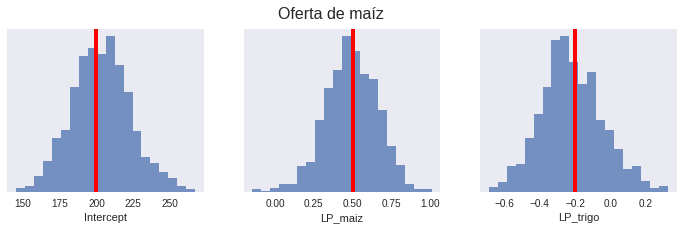

In [9]:
plot_result('ms_ols')

{badge}`oferta de trigo, badge-primary`

,Intercept,LP_maiz,LP_trigo
promedio,82.529,-0.219,0.394
verdadero,80.000,-0.200,0.400


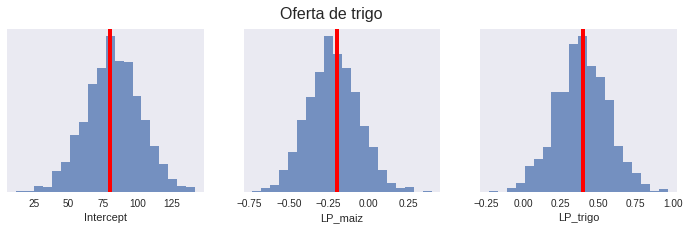

In [10]:
plot_result('ws_ols')

Las ecuaciones de demanda sí son simultáneas, por lo que la estimación OLS estaría sesgada.

{badge}`demanda de maiz,badge-danger`

,Intercept,P_maiz,P_trigo
promedio,153.18,-0.158,0.722
verdadero,100.00,-0.200,1.200


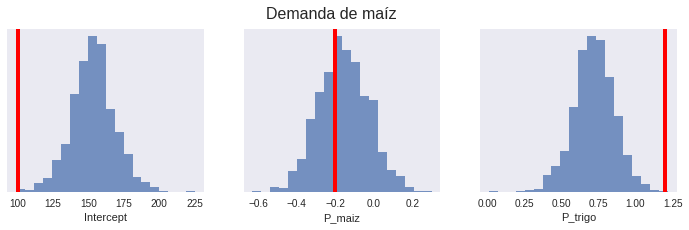

In [11]:
plot_result('md_ols')

{badge}`demanda de trigo, badge-danger`

,Intercept,P_maiz,P_trigo
promedio,80.788,0.608,-0.259
verdadero,50.000,1.100,-0.400


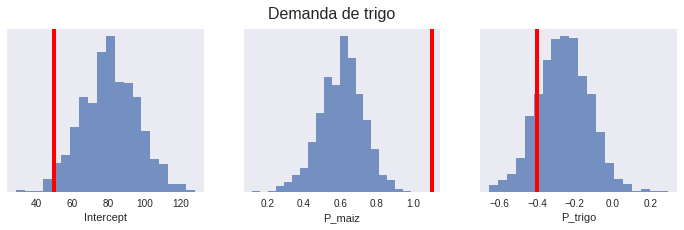

In [12]:
plot_result('wd_ols')

Por ello, estimamos el sistema por 2SLS:

{badge}`demanda de maiz,badge-primary`

Se detectaron 9 outliers


,1,P_maiz,P_trigo
promedio,94.624,-0.344,1.361
verdadero,100.000,-0.200,1.200


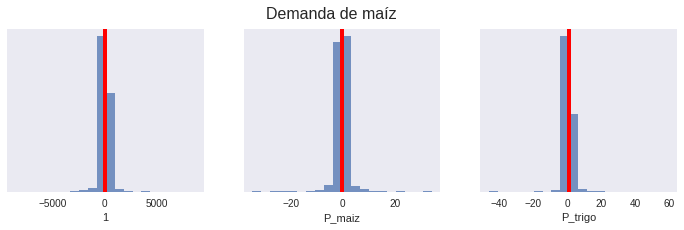

In [13]:
plot_result('md_2sls', True)

{badge}`demanda de trigo, badge-primary`

Se detectaron 18 outliers


,1,P_maiz,P_trigo
promedio,58.321,0.977,-0.37
verdadero,50.000,1.100,-0.40


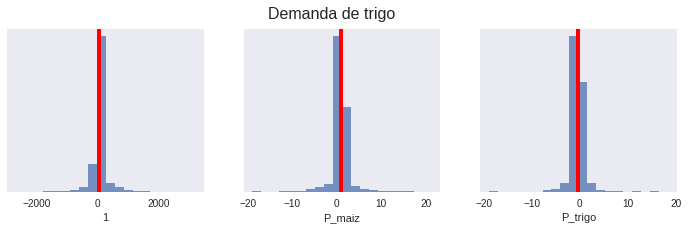

In [14]:
plot_result('wd_2sls', True)

{{ termina_ejemplo }}